# Data Exploratory of diabetes dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Explore the data

Looking at the data for first impression

In [2]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


The data types of the columns look obvious but we will check them anyway

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Shape of the data

In [5]:
df.shape

(768, 9)

Get basic insights about the data: we will call the `info()` and `describe()` methods for that

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that we have 8 columns of attribute and one column which is the target.  
The `outcome` column (target) has values 0 and 1, does not has diabetes and has diabetes respectively.  

From the `describe()` method we can see that there is something weird about some of the columns values.  

**Lets take a look at Blood Pressure column:**

In [8]:
df['BloodPressure'].min()

0

I'm no doctor but i know that if you have blood pressure of `0` then something is wrong.  
From the `info()` method we can see that there are no NaN values so can guess that the `NaN` values were replaced by `0`.  

The following columns should not have the value `0`, we will replace them with `Nan`:
<ol>
    <li>Glucose</li>
    <li>BloodPressure</li>
    <li>SkinThickness</li>
    <li>Insulin</li>
    <li>BMI</li>
</ol>  

The `Pregnancies` column has min value of `0` but it's in our range since a woman can have diabetes without ever getting pregnant.  
Also the dataset description stated that the dataset included only female patiants so we know that there are no men here.

## Handle Missing Values

There are several ways to handle missing values like:
<il>
    <li>Average Imputation</li>
    <li>Mean Imputation</li>
    <li>Multiple Imputation</li>
    <li>Common-Point Imputation</li>
<il>
    
We will use the Mean Imputation, but first we will replace the `0` values to be `NaN` so we can use the built-in functions of pandas to handle them.

In [9]:
columns_to_adjust = ['BMI', 'BloodPressure', 'Glucose', 'SkinThickness', 'Insulin']
df[columns_to_adjust] = df[columns_to_adjust].replace(0, np.nan)

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Lets see how many `NaN` values we have in our dataset:

In [11]:
df.isnull().sum()[columns_to_adjust]

BMI               11
BloodPressure     35
Glucose            5
SkinThickness    227
Insulin          374
dtype: int64

Filling the `NaN` values with the median of the column:

In [12]:
medians = df[columns_to_adjust].median()
for i, column in enumerate(columns_to_adjust):
    df[column].fillna(medians[i], inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Data Visualization

Lets start by checking the ratio of non-diabetic and diabetic people:

In [13]:
counts = df.groupby('Outcome')['Outcome'].agg('count')
counts

Outcome
0    500
1    268
Name: Outcome, dtype: int64

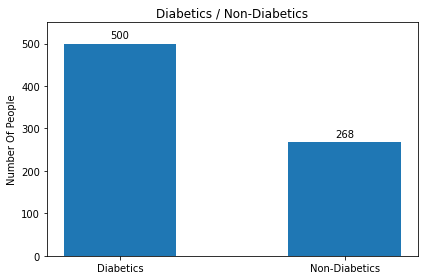

In [14]:
labels = ['Diabetics', 'Non-Diabetics']
values = counts.values

# setting parameters for chart
width = 0.5
bar_locations = np.arange(len(values))# + width/2

fig, ax = plt.subplots()
bars = ax.bar(bar_locations, values, width)

ax.set_ylabel("Number Of People")
ax.set_title("Diabetics / Non-Diabetics")
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylim(0, 550)

for bar in bars:
    h = bar.get_height()
    ax.annotate(h, xy=(bar.get_x() + bar.get_width()/2, h), xytext=(0,3), textcoords="offset points", ha='center', va='bottom')
    
fig.tight_layout()
plt.show()

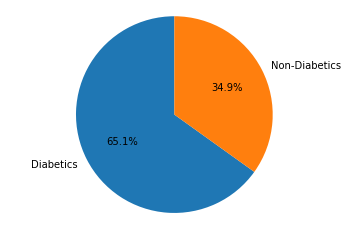

In [15]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
fig.tight_layout()
plt.show()

First we see that we have almost twice diabetics than non-diabetics, we can see the percentages in the pie chart.  
If we were to train a ML model we would like to know that we have 1:2 ratio so we could balance our non-diabetics in our train/test sets.

### Insights for feature engineering
Lets see which of the features are most correlated with another, we will plot 2 types of charts for that:  
1. Heatmap of correlation
2. Pairplot

In [16]:
import seaborn as sns

We are going to use the built-in function `corr()` to get the pearson correlation between the features, which is the linear correlation between two features.  
For more information on Pearson correlation: [wiki page](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

<AxesSubplot:>

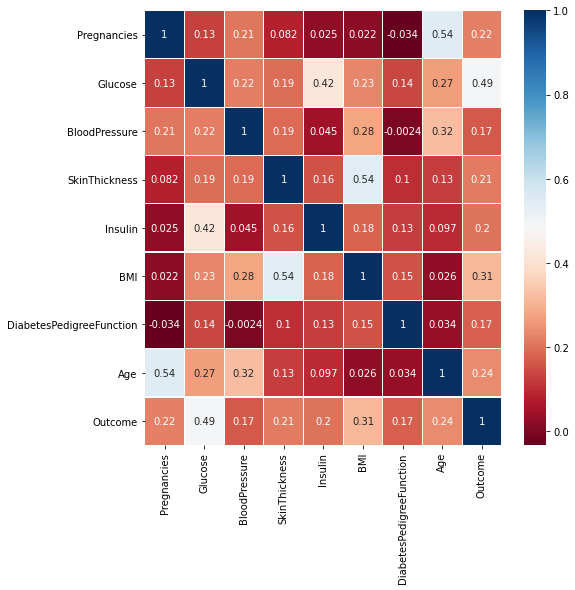

In [17]:
color_map = plt.cm.RdBu
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap=color_map, linecolor='white', linewidths=0.1, annot=True)

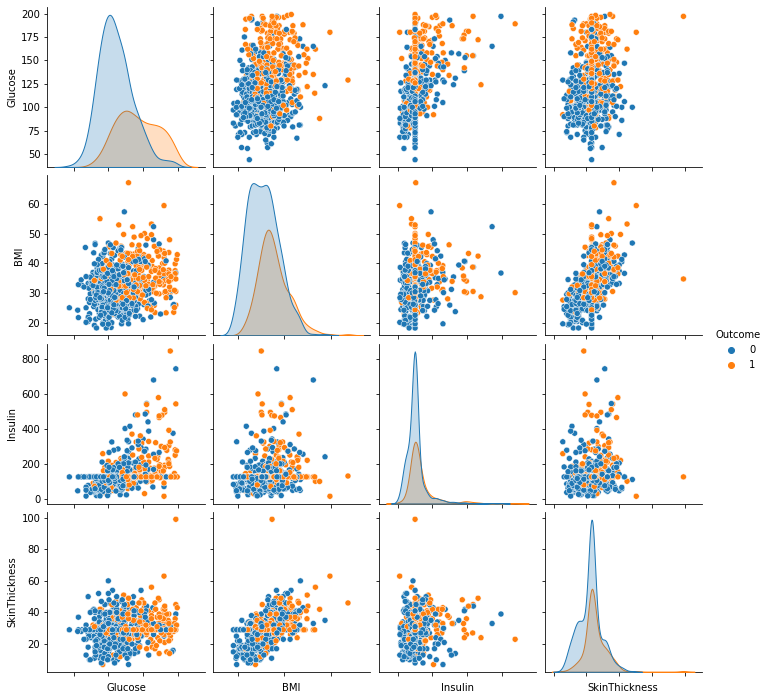

In [18]:
graph = sns.pairplot(df[['Outcome', 'Glucose', 'BMI', 'Insulin', 'SkinThickness']], hue='Outcome')
graph.set(xticklabels=[])

From the heatmap above there are some insights about our dataset:  
The **Outcome** is most influenced from:
<ol>
    <li><b>Glucose</li>
    <li><b>BMI</li>
</ol>

There is some connection between `Age` and the `Outcome`.  
Lets check the most important features that influence our `Glucose` and `BMI` features:
`Glucose` feature - most influenced from `Insulin` feature  
`BMI` feature - most influenced from `SkinThickness` feature  

Lets check the connection between `Glucose` and `Insulin`, and also the connection between `BMI` and `SkinThickness`.<br>
We are going to use the `linear regression correlation test` from the `scipy` package.  
This will confirm our theory we got from the heatmap and pairplot charts.  

Since the rejection of the null hypothesis is determined by the `p-value` which suppose to be under the value of `0.05` we will extract that criteria from the `linregress()` function.

In [19]:
from scipy.stats import linregress
def make_assesment(feature1, feature2, target='Outcome'):
    sns.lmplot(x=feature1, y=feature2, data=df, hue=target)
    
    result = linregress(df[feature1], df[feature2])
    pvalue = result.pvalue
    greater = pvalue > 0.05
    if greater:
        print("pvalue = {}, hence the features are not correlated!".format(pvalue))
    else:
        print("pvalue = {}, hence the features are correlated!".format(pvalue))

### Glucose & Insulin

pvalue = 4.434894000812824e-34, hence the features are correlated!


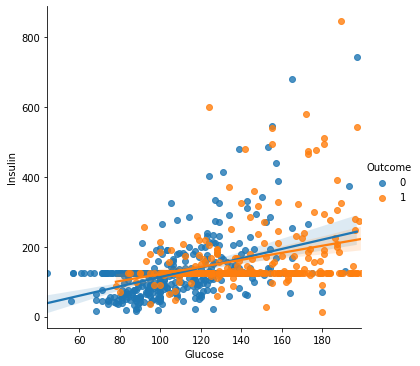

In [20]:
make_assesment('Glucose', 'Insulin')

### BMI & SkinThickness

pvalue = 3.654958867621233e-60, hence the features are correlated!


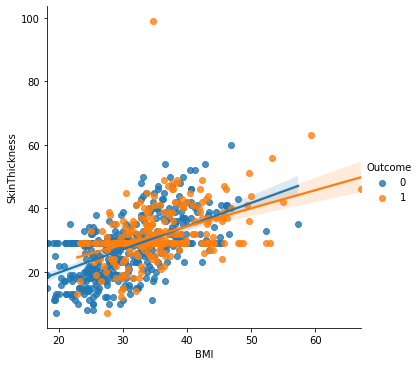

In [21]:
make_assesment('BMI', 'SkinThickness')

### Age & BMI - Not Correlated Features

**We are getting p-value higher than 0.05**

pvalue = 0.47874466950442707, hence the features are not correlated!


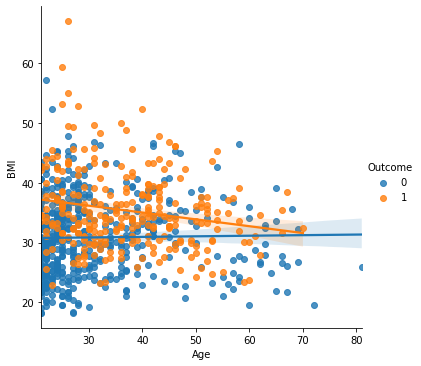

In [22]:
make_assesment('Age', 'BMI')